## Title: Statistical Analysis, Sentiment Insights, and ML Forecasting for Ireland Production Index: A Comparative Study with UK Index

## 1. Exploratory Data Analysis : Data Understanding, Data Cleaning & Data Pre-processing and Preparation

### 1.1 Import all necessary Libraries

In [1]:
#Import libraries as needed
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
import dash
from dash import dcc
from dash import html
import dash_html_components as html
import plotly.graph_objs as go
from jupyter_dash import JupyterDash
import plotly.graph_objects as go
import panel as pn

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

C:\Users\kunchaku\AppData\Local\Temp\ipykernel_27284\3850857744.py:26: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### 1.2 Definition of functions


In [2]:
# Create a box plot of Index by year for Ireland & UK Index
def create_box_plot(data, labels, ylabel, title):
    """
    Create a box plot with the given data and labels.
    Parameters:
    data (list): List of data arrays for the box plot.
    labels (list): Labels for the x-axis tick marks.
    ylabel (str): Label for the y-axis.
    title (str): Title of the plot.

    Returns:
    None
    """
    fig, ax = plt.subplots()  # Create a figure and axis

    ax.boxplot(data)  # Create the box plot

    ax.set_xticklabels(labels)  # Set x-axis tick labels
    ax.set_ylabel(ylabel)  # Set y-axis label
    ax.set_title(title)  # Set plot title

    plt.show()  # Display the plot

# Plot function for predicted value against the real value
def plot_predicted(y_pred, y_test, label1):
    """
    Plot the predicted values against the real values.
    Parameters:
    y_pred (array-like): Predicted values.
    y_test (array-like): Real values.
    label1 (str): Label for the plot.

    Returns:
    plt: Matplotlib plot object.
    """
    plt.plot(y_pred, y_test, 'go', label=label1)
    plt.plot([0, 1], [0, 1], 'r-')
    plt.xlabel('Actual prices')
    plt.ylabel('Predicted Value')
    plt.title(f"{label1} performance")
    plt.show()
    return plt

# Function to derive descriptive stats summary for Mean and Standard Deviation
def descriptive_stats(data, label):
    """
    Compute descriptive statistics (mean and standard deviation) for a given dataset.
    Parameters:
    data (array-like): Data for which statistics are computed.
    label (str): Label for the dataset.

    Returns:
    None
    """
    mean = data.mean()
    std = data.std()
    print(f"Descriptive Statistics for {label}:")
    print("Mean:", mean)
    print("Standard Deviation:", std)

#Function to perform  Shapiro-Wilk test to understand Normality of Variable
def perform_shapiro_test(data, label):
    """
    Perform Shapiro-Wilk test to determine the normality of the data.
    Parameters:
    data (array-like): Data for performing the Shapiro-Wilk test.
    label (str): Label for the data being tested.

    Returns:
    None
    """
    stat, p_value = stats.shapiro(data)

    # Print test results
    print(f"\n{label} Index:")
    print(f"Observations: {len(data)}")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check normality based on p-value
    if p_value > 0.05:
        print(f"The {label} index data follows a normal distribution.")
    else:
        print(f"The {label} index data does not follow a normal distribution.")
    
# Function to derive Confidence Interval for Population mean in Inferential Stats
def calculate_confidence_interval(data, label, confidence_level=0.95):
    """
    Calculate the confidence interval for the population mean of a given dataset.
    Parameters:
    data (array-like): Data for which confidence interval is calculated.
    label (str): Label for the dataset.
    confidence_level (float): Confidence level (default: 0.95).

    Returns:
    None
    """
    sample_size = len(data)
    standard_error = data.std() / np.sqrt(sample_size)
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1) * standard_error
    confidence_interval = (data.mean() - margin_of_error, data.mean() + margin_of_error)
    print(f"Confidence Interval for Yearly Population Proportion of {label} Index")
    print(f"({confidence_level * 100}%):", confidence_interval)

# Normalization function for Data preparation
def zero_one_normalize(values):
    """
    Perform 0-1 normalization on a list of numerical values.
    Parameters:
    values (list): A list of numerical values to be normalized.

    Returns:
    list: A list of the normalized values.
    """
    min_val = min(values)
    max_val = max(values)
    normalized = [(val - min_val) / (max_val - min_val) for val in values]
    return normalized

# Standardization function to be used for Numerical transformation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Perform standardization
])

### 1.3 Data Collection : Import Ireland and UK construction Production Index Dataset

In [3]:
# Load the raw CSV files of Ireland & UK Construction Production Index
ireland_data = pd.read_csv('ireland_construction_index.csv')  # Load Ireland data from CSV file
uk_data = pd.read_csv('uk_construction_index.csv')  # Load UK data from CSV file

### 1.4 Data Cleaning

#### 1.4.1 Summary of Data

In [4]:
#Check the data loading to pandas 
ireland_data.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02196V02652,State,UNIT,VALUE
0,HSA09,House Construction Production Index,1975,1975,-,State,Base Jan 1991=100,20.0
1,HSA09,House Construction Production Index,1976,1976,-,State,Base Jan 1991=100,22.9
2,HSA09,House Construction Production Index,1977,1977,-,State,Base Jan 1991=100,26.9
3,HSA09,House Construction Production Index,1978,1978,-,State,Base Jan 1991=100,29.6
4,HSA09,House Construction Production Index,1979,1979,-,State,Base Jan 1991=100,34.2


In [5]:
uk_data.head()

,Year,Value
0,1990,89.2
1,1991,85.9
2,1992,85.3
3,1993,86.3
4,1994,89.4


#### 1.4.2 Merge of Datasets

In [6]:
# Merge the datasets based on the common years as Ireland dataset and UK dataset are differing in years of availablity
merged_data = pd.merge(ireland_data, uk_data, on='Year')

In [7]:
#check the updated dataframe after merging
merged_data.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02196V02652,State,UNIT,VALUE,Value
0,HSA09,House Construction Production Index,1990,1990,-,State,Base Jan 1991=100,98.6,89.2
1,HSA09,House Construction Production Index,1991,1991,-,State,Base Jan 1991=100,102.2,85.9
2,HSA09,House Construction Production Index,1992,1992,-,State,Base Jan 1991=100,104.7,85.3
3,HSA09,House Construction Production Index,1993,1993,-,State,Base Jan 1991=100,107.3,86.3
4,HSA09,House Construction Production Index,1994,1994,-,State,Base Jan 1991=100,111.0,89.4


In [8]:
# Rename columns in the merged_data DataFrame
merged_data.rename(columns={'VALUE': 'Ireland_Index', 'Value': 'UK_Index'}, inplace=True)

In [9]:
#check the updated dataframe after renaming
merged_data.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02196V02652,State,UNIT,Ireland_Index,UK_Index
0,HSA09,House Construction Production Index,1990,1990,-,State,Base Jan 1991=100,98.6,89.2
1,HSA09,House Construction Production Index,1991,1991,-,State,Base Jan 1991=100,102.2,85.9
2,HSA09,House Construction Production Index,1992,1992,-,State,Base Jan 1991=100,104.7,85.3
3,HSA09,House Construction Production Index,1993,1993,-,State,Base Jan 1991=100,107.3,86.3
4,HSA09,House Construction Production Index,1994,1994,-,State,Base Jan 1991=100,111.0,89.4


In [10]:
# Descriptive stats summary of Ireland Dataset
print("Dataset Information:")
merged_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        27 non-null     object 
 1   STATISTIC Label  27 non-null     object 
 2   TLIST(A1)        27 non-null     int64  
 3   Year             27 non-null     int64  
 4   C02196V02652     27 non-null     object 
 5   State            27 non-null     object 
 6   UNIT             27 non-null     object 
 7   Ireland_Index    27 non-null     float64
 8   UK_Index         27 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.1+ KB


#### 1.4.3 Missing Value Analysis

<Axes: >

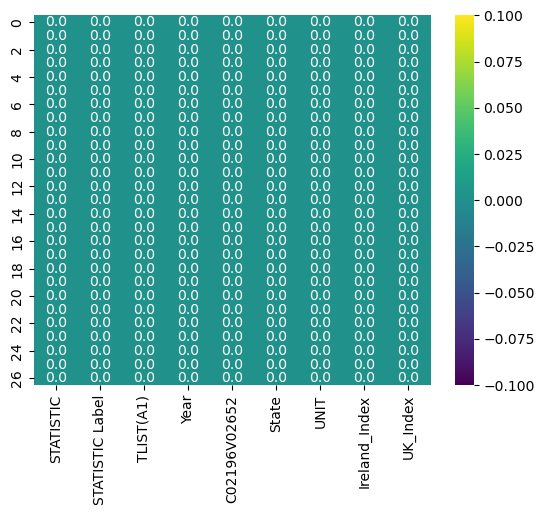

In [11]:
#Heatmap to check for null values from all variables of Dataset
sns.heatmap(merged_data.isnull(),annot=True, fmt=".1f",cmap = 'viridis')

**Observation**:: No null values visible from heatmap plotting which is quickest way for pattern identificaiton of high and low values 

In [12]:
#checking number of total null values in the dataset for each Coloumn
merged_data.isnull().sum()

STATISTIC          0
STATISTIC Label    0
TLIST(A1)          0
Year               0
C02196V02652       0
State              0
UNIT               0
Ireland_Index      0
UK_Index           0
dtype: int64

**Observation**: No missing values found after merging data based on common years. No actions required to handle Null values 

#### 1.4.4 Duplicate Handling

In [13]:
duplicate_rows_df = merged_data[merged_data.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


**Observation** : No duplicate rows present in the dataset needing no actions to drop the duplicates 

#### 1.4.5 Box Plot for outlier handling

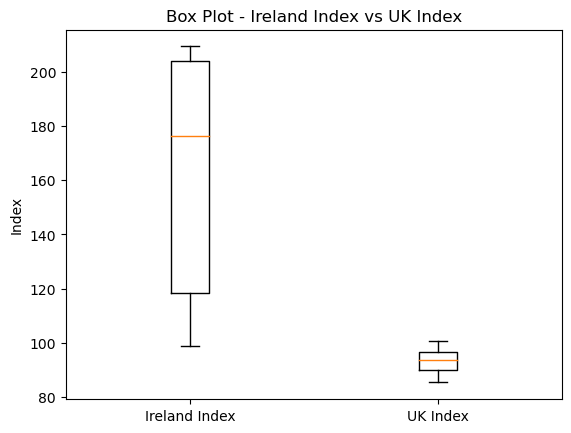

In [14]:
# Define variables of Index for Ireland & UK to be used for the box plot
ireland_index = merged_data['Ireland_Index']
uk_index = merged_data['UK_Index']

# Create a list of data for the box plot
data = [ireland_index, uk_index]

# Set labels for x-axis tick marks
labels = ['Ireland Index', 'UK Index']

# Set y-axis label
ylabel = 'Index'

# Set plot title
title = 'Box Plot - Ireland Index vs UK Index'

# Create the box plot using the defined function
create_box_plot(data, labels, ylabel, title)


Box plot for Ireland Index and UK Index shows no outliers from the dataset which implies there are no outlier data values impacting the signal. This means no action required to handle outliers in the dataset

## 2 Statistics

### 2.1 Descriptive Statistics

#### 2.1.1 Summary of Descriptive Stats

In [15]:
# Calculate descriptive statistics
print("Descriptive Statistics:")
print(merged_data.describe())

Descriptive Statistics:
         TLIST(A1)         Year  Ireland_Index    UK_Index
count    27.000000    27.000000      27.000000   27.000000
mean   2003.000000  2003.000000     163.088889   93.533333
std       7.937254     7.937254      42.490518    4.374489
min    1990.000000  1990.000000      98.600000   85.300000
25%    1996.500000  1996.500000     118.350000   89.850000
50%    2003.000000  2003.000000     176.500000   93.500000
75%    2009.500000  2009.500000     204.100000   96.700000
max    2016.000000  2016.000000     209.400000  100.600000


Standard Deviation: It measures the dispersion or variability of the values around the mean. A higher standard deviation indicates a wider spread of data points. In this case, Ireland_Index has a standard deviation of 42.490518, suggesting a relatively higher variability compared to UK_Index, which has a standard deviation of 4.374489.

####  2.1.2 Correlation Analysis 

In [16]:
#check the correlation of data to determine the matrix of variable relationship
merged_data.corr()

,TLIST(A1),Year,Ireland_Index,UK_Index
TLIST(A1),1.000000,1.000000,0.957997,0.419382
Year,1.000000,1.000000,0.957997,0.419382
Ireland_Index,0.957997,0.957997,1.000000,0.515739
UK_Index,0.419382,0.419382,0.515739,1.000000


Output : The result of Correlation matrix shows that both the Index variables are postively related against year & to each other denoting moving in same direction. As the dataset is limited in number of features available and from correlation it is evident that Index Values and Yearare related and can be used for Forecasting technique

#### 2.1.3  Line Plot (Time series) for Comparison

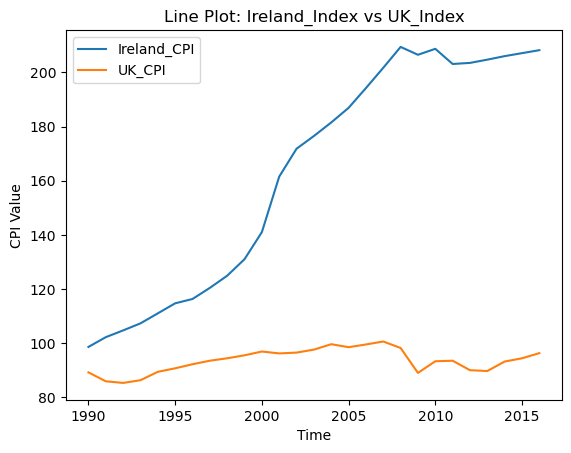

In [17]:
#Line Plot (Time Series Plot) for Comparison 
plt.plot(merged_data.Year,merged_data.Ireland_Index , label='Ireland_CPI')
plt.plot(merged_data.Year,merged_data.UK_Index , label='UK_CPI')
plt.xlabel('Time')
plt.ylabel('CPI Value')
plt.title('Line Plot: Ireland_Index vs UK_Index')
plt.legend()
plt.show()

#### 2.1.4  Dual Axis Plot 

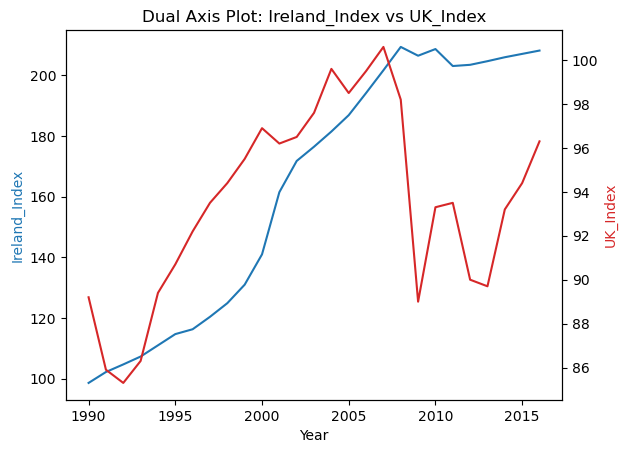

In [18]:
fig, ax1 = plt.subplots()
ax1.plot(merged_data.Year,merged_data.Ireland_Index , color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Ireland_Index', color='tab:blue')

ax2 = ax1.twinx()
ax2.plot(merged_data.Year,merged_data.UK_Index, color='tab:red')
ax2.set_ylabel('UK_Index', color='tab:red')

plt.title('Dual Axis Plot: Ireland_Index vs UK_Index')
plt.show()

### 2.2 Interactive Dashboard 

#### 2.2.1 Dashboard using Plotly Dash

In [19]:
# Initialize the Dash app
app = dash.Dash(__name__)

app = JupyterDash(__name__)
app.layout = html.Div(
    children=[
        html.H1('Interactive Dashboard'),
        
        dcc.Graph(
            id='construction-index-graph',
            figure={
                'data': [
                    go.Scatter(
                        x=merged_data['Year'],
                        y=merged_data['Ireland_Index'],
                        mode='lines',
                        name='Ireland Construction Index'
                    ),
                    go.Scatter(
                        x=merged_data['Year'],
                        y=merged_data['UK_Index'],
                        mode='lines',
                        name='UK Construction Index'
                    )
                ],
                'layout': go.Layout(
                    title='Ireland Vs UK Construction Index Comparison',
                    xaxis={'title': 'Year'},
                    yaxis={'title': 'Index Value'},
                    hovermode='closest'
                )
            }
        )
    ]
)

# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



#### 2.2.2 Dashboard using Panel

In [20]:
# Create the Plotly graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_data['Year'], y=merged_data['Ireland_Index'], mode='lines', name='Ireland Construction Index'))
fig.add_trace(go.Scatter(x=merged_data['Year'], y=merged_data['UK_Index'], mode='lines', name='UK Construction Index'))
fig.update_layout(
    title='Ireland Vs UK Construction Index Comparison',
    xaxis_title='Year',
    yaxis_title='Index Value',
    hovermode='closest'
)

# Create the Panel dashboard layout
dashboard = pn.Column(
    '# Interactive Dashboard',
    pn.pane.Plotly(fig, width=1200, height=800)
)

# Run the Panel dashboard
dashboard.show()


Launching server at http://localhost:63721


### 2.3 Inferential Stats

#### 2.3.1 Confidence Interval of Population propotion for Ireland & UK Index

In [21]:
# Descriptive stats for Ireland Index
descriptive_stats(ireland_index, "Ireland Construction Index")

# Calculate confidence interval for Ireland Index
calculate_confidence_interval(ireland_index, "Ireland", confidence_level=0.95)
print("=================================")

# Descriptive stats for UK Index
descriptive_stats(uk_index, "UK Construction Index")

# Calculate confidence interval for UK Index
calculate_confidence_interval(uk_index, "UK", confidence_level=0.95)

Descriptive Statistics for Ireland Construction Index:
Mean: 163.08888888888887
Standard Deviation: 42.49051779590479
Confidence Interval for Yearly Population Proportion of Ireland Index
(95.0%): (146.28019986525817, 179.89757791251958)
Descriptive Statistics for UK Construction Index:
Mean: 93.53333333333333
Standard Deviation: 4.374488981144407
Confidence Interval for Yearly Population Proportion of UK Index
(95.0%): (91.80284312668205, 95.26382353998461)


**Construction Insights**:

The wider confidence interval for the Ireland Index indicates greater variability and uncertainty in the estimated population proportion compared to the UK Index, which has a narrower confidence interval.

The findings suggest that there is a higher degree of variability in the yearly population proportion of the Ireland Construction Index, as evidenced by the larger standard deviation and wider confidence interval. On the other hand, the UK Construction Index exhibits relatively lower variability and a more precise estimate of the population proportion, reflected by the smaller standard deviation and narrower confidence interval.

These results have implications for machine learning models and time-series forecasting. The wider confidence interval for the Ireland Construction Index indicates a higher level of uncertainty in predicting future values. This suggests that forecasting models for the Ireland Index may need to account for the larger variability and incorporate more robust techniques to capture the inherent volatility in the data.

Further research could focus on exploring the factors contributing to the higher variability in the Ireland Construction Index and investigating potential relationships between the construction indices of Ireland and the UK. Additionally, examining the relevance of other variables or external factors that may influence the construction indices can enhance the forecasting accuracy and provide a more comprehensive understanding of the construction industry dynamics!

#### 2.3.2 Shapiro-Wilk test to understand Normality

In [22]:
# Perform Shapiro-Wilk test for Ireland index data
perform_shapiro_test(ireland_index, "Ireland")

# Perform Shapiro-Wilk test for UK index data
perform_shapiro_test(uk_index, "UK")


Ireland Index:
Observations: 27
Test Statistic: 0.8368995785713196
P-value: 0.0006409225170500576
The Ireland index data does not follow a normal distribution.

UK Index:
Observations: 27
Test Statistic: 0.9611212015151978
P-value: 0.3918473720550537
The UK index data follows a normal distribution.


Observation : Ireland Index clearly doesnt look to follow normal distribution and UK Index has possiblity to fall under Normality

#### 2.3.3 Histogram Visualization to understand Normality

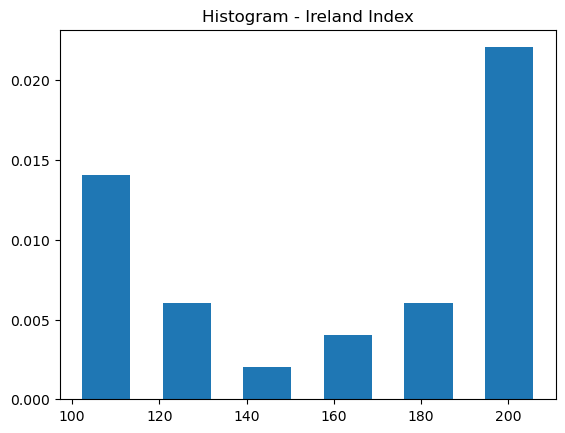

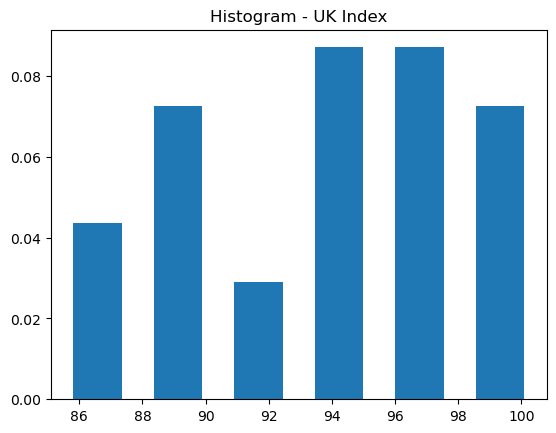

In [23]:
# Plot histogram for Ireland index data
plt.hist(ireland_index, bins='auto',rwidth=0.6,density=True)
plt.title('Histogram - Ireland Index')
plt.show()

# Plot histogram for UK index data
plt.hist(uk_index, bins='auto',rwidth=0.6,density=True)
plt.title('Histogram - UK Index')
plt.show()

#### 2.3.3 Parametric & Non-Parametric methods

In [24]:
#Define variables as needed for inferential stats. Ireland_index, Uk_Index are already defined and uk_index_mean
uk_mean = uk_index.mean()
# List of methods
methods = [
    {'name': 'T-test (One Population)', 'function': stats.ttest_1samp, 'args': [uk_index, uk_mean]},
    {'name': 'T-test (Two Population)', 'function': stats.ttest_ind, 'args': [uk_index, ireland_index]},
    {'name': 'ANOVA', 'function': stats.f_oneway, 'args': [uk_index, ireland_index]},
    {'name': 'Mann-Whitney U Test', 'function': stats.mannwhitneyu, 'args': [uk_index, ireland_index]},
    {'name': 'Wilcoxon Rank-Sum Test', 'function': stats.ranksums, 'args': [uk_index, ireland_index]},
    {'name': 'Kruskal-Wallis Test', 'function': stats.kruskal, 'args': [uk_index, ireland_index]}
]

#Hypothesis T-test one population for UK Index wher Null Hypothesis H0 = Populatio mean of UK is equal to Sample mean 
# Alternate Hypothesis for T-test One population is  H1= Population mean of Uk Index is not equal to Sample Mean.

#The following statistical tests were performed on the construction index data for the UK and Ireland for comparison 
#T-test (Two Population) ,ANOVA (Analysis of Variance),Mann-Whitney U Test ,Wilcoxon Rank-Sum Test, Kruskal-Wallis Test
#H0: μ1 = μ2 (Null Hypothesis) : The Population sample mean of Ireland Index & UK Index are equal 
#H1: μ1 ≠ μ2 (Alternate Hypothesis): The population sample mean of Ireland Index & UK Index are not equal  


# Perform analysis for each method
for method in methods:
    # Execute the statistical test
    result = method['function'](*method['args'])
    
    # Analysis and Report
    print(f"{method['name']} Results:")
    print("=================================")
    if isinstance(result, tuple):
        statistic, p_value = result
        print(f"Test Statistic: {statistic}")
        print(f"P-value: {p_value}")
    else:
        print(f"Test Statistic: {result.statistic}")
        print(f"P-value: {result.pvalue}")
    print("=================================")
    
    # Insights
    print("Insights:")
    print("=================================")
    alpha = 0.05  # significance level

    if p_value < alpha:
        print("The null hypothesis can be rejected.")
        print("There is evidence to suggest that there is a significant difference between the groups.")
    else:
        print("The null hypothesis cannot be rejected.")
        print("There is no significant evidence to suggest a difference between the groups.")
    print("=================================")
    print()


T-test (One Population) Results:
Test Statistic: 0.0
P-value: 1.0
Insights:
The null hypothesis cannot be rejected.
There is no significant evidence to suggest a difference between the groups.

T-test (Two Population) Results:
Test Statistic: -8.461205057237729
P-value: 2.393799185681338e-11
Insights:
The null hypothesis can be rejected.
There is evidence to suggest that there is a significant difference between the groups.

ANOVA Results:
Test Statistic: 71.59199102062537
P-value: 2.393799185681317e-11
Insights:
The null hypothesis can be rejected.
There is evidence to suggest that there is a significant difference between the groups.

Mann-Whitney U Test Results:
Test Statistic: 3.0
P-value: 4.223665471424405e-10
Insights:
The null hypothesis can be rejected.
There is evidence to suggest that there is a significant difference between the groups.

Wilcoxon Rank-Sum Test Results:
Test Statistic: -6.253941518097568
P-value: 4.002209322324344e-10
Insights:
The null hypothesis can be reje

Insights : Refer to Report for findings, result and insights for Inferential stats methods performed

## 3 Data Preparation

### 3.1 Encoding and Normalization of Data

In [25]:
# Split the data into training and testing sets
X = merged_data[['Year']]
y = merged_data['Ireland_Index'].values

X_transformed = numeric_transformer.fit_transform(X)

#Normalization of Y
y_transformed = zero_one_normalize(y)



## 4 Machine Learning Models

Machine learning modelling for Time series of Ireland construction production index using Linear Regression, Random forest, Gradient Boosting and Support Vector Regression for forecasting Index

### 4.1 Split of data to Train and Test the ML models

In [26]:
#Split of data to Train and Test the ML models
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.4, random_state=42)

### 4.2  Machine Learning Model & Hyperparameter tuning using GridsearchCV

Training Linear Regression
Mean Squared Error: 0.012565784934856524
Mean Absolute Error: 0.09854985200069076
R-squared: 0.896954330599115
Best Parameters: {}
Best Positive Score: 0.015280964823237033
--------------------


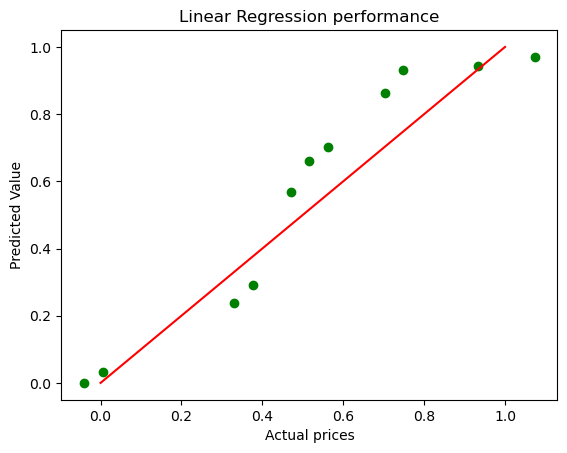

Training Random Forest
Mean Squared Error: 0.003802837097935614
Mean Absolute Error: 0.04642509025270754
R-squared: 0.9688148494972019
Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Positive Score: 0.0026971927321590584
--------------------


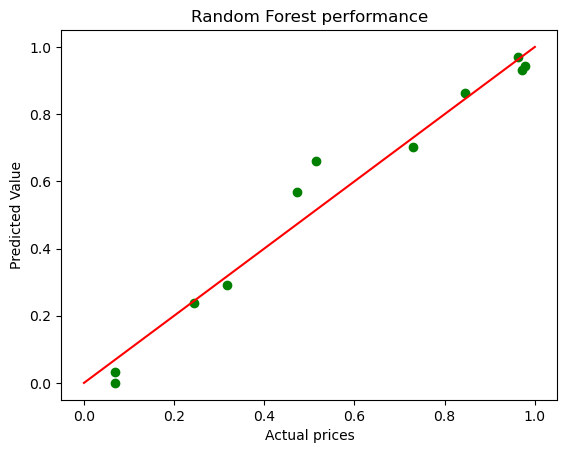

Training Gradient Boosting
Mean Squared Error: 0.012612502173877115
Mean Absolute Error: 0.08311455119825141
R-squared: 0.8965712260662589
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best Positive Score: 0.009603916942931907
--------------------


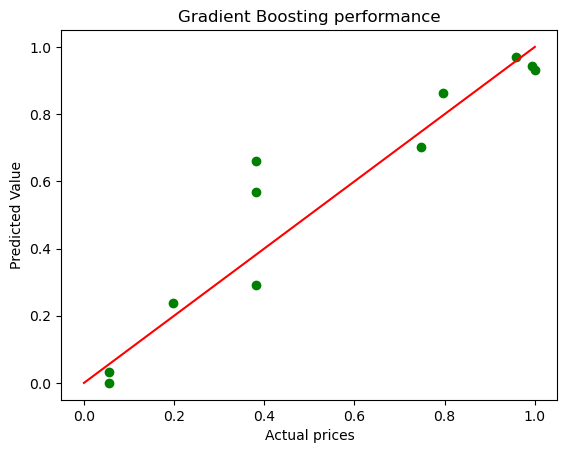

Training Support Vector Regression
Mean Squared Error: 0.00837920439278293
Mean Absolute Error: 0.07205799809129226
R-squared: 0.9312863676899297
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Positive Score: 0.007796475785397175
--------------------


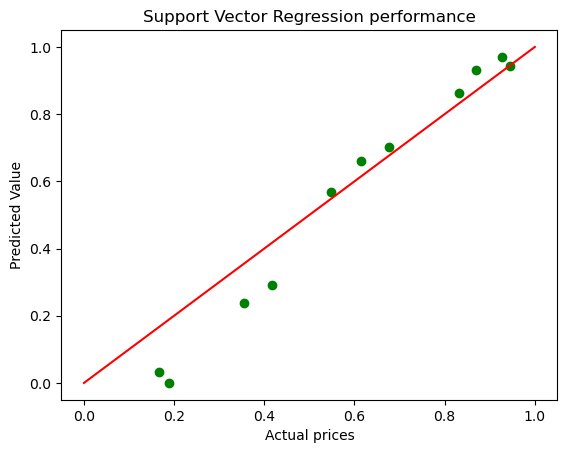

In [27]:
# Define the models and their corresponding hyperparameters for tuning
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    'Gradient Boosting': (GradientBoostingRegressor(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01]}),
    'Support Vector Regression': (SVR(), {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}),
  }
#initializing variables to store values for plotting tabular and visualization of Model performance
mse1=[]
mae1=[]
r2_score1=[]
models1=[]
y_pred_model=[]

# Perform model training and evaluation for each model
for model_name, (model, params) in models.items():
    print("Training", model_name)
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
 
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred_model.append(y_pred)
    
    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse1.append(mse.round(5))
    mae1.append(mae.round(5))
    r2_score1.append(r2.round(5))
    models1.append(model_name)
    
    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Best Positive Score: {-grid_search.best_score_}")
    print("--------------------")
    plot_predicted(y_pred, y_test,model_name)




### 4.3 Cross Validation with 5 Folds for each Model

In [28]:
# Perform cross-validation for each model
# Define the models
models2 = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
   }


for model_name2, model2 in models2.items():
    print("Performing cross-validation for", model_name2)
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error', cv=5)
    
    # Convert the negative MSE scores to positive
    positive_scores = -scores
    
    # Calculate the mean and standard deviation of the scores
    mean_score = positive_scores.mean()
    std_score = positive_scores.std()
    
    # Print the cross-validation results
    print("Mean MSE:", mean_score)
    print("Standard Deviation:", std_score)
    print("--------------------")


Performing cross-validation for Linear Regression
Mean MSE: 379.717119584148
Standard Deviation: 339.16007353511674
--------------------
Performing cross-validation for Random Forest
Mean MSE: 173.80284146666457
Standard Deviation: 106.66253960179768
--------------------
Performing cross-validation for Gradient Boosting
Mean MSE: 181.64644452225224
Standard Deviation: 159.6397100870701
--------------------
Performing cross-validation for Support Vector Regression
Mean MSE: 3207.1351400249905
Standard Deviation: 2197.0943375396346
--------------------


### 4.4 Machine Learning Model Comparison using Table and Visual plot

In [29]:
#Tabluar plot of Regression scores and Mean Square error values
col={'R2 Scores':r2_score1,'Mean Square Error':mse1,'Mean Abosulte error':mae1}
display_df=DataFrame(data=col,index=models1)
display_df

,R2 Scores,Mean Square Error,Mean Abosulte error
Linear Regression,0.89695,0.01257,0.09855
Random Forest,0.96881,0.00380,0.04643
Gradient Boosting,0.89657,0.01261,0.08311
Support Vector Regression,0.93129,0.00838,0.07206


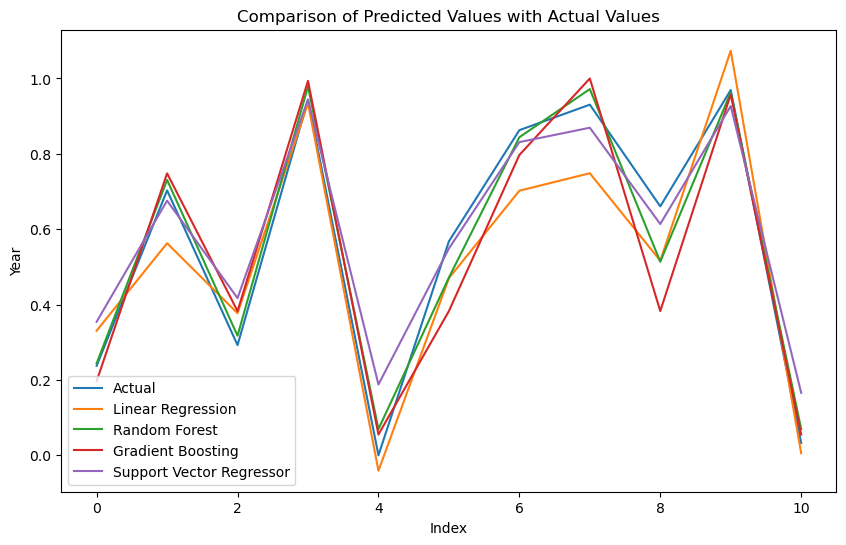

In [30]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_model[0], label='Linear Regression')
plt.plot(y_pred_model[1], label='Random Forest')
plt.plot(y_pred_model[2], label='Gradient Boosting')
plt.plot(y_pred_model[3], label='Support Vector Regressor')
plt.xlabel('Index')
plt.ylabel('Year')
plt.title('Comparison of Predicted Values with Actual Values')
plt.legend()
plt.show()


**ML Model Insights and Findings**

Random Forest Outperforms Other Models:
Random Forest achieved the lowest MSE and MAE values among all the models, indicating better accuracy in predicting the Ireland Index values.
The R-squared score of 0.965 suggests that the Random Forest model explains a significant portion of the variance in the data.

Linear Regression and Gradient Boosting:
Both Linear Regression and Gradient Boosting models show relatively similar performance, with comparable MSE and MAE values.
The R-squared scores for both models are around 0.896, indicating a good fit to the data but slightly lower than the Random Forest model.

Support Vector Regression:
The Support Vector Regression model performs reasonably well, with a lower MSE and MAE compared to Linear Regression and Gradient Boosting.
The R-squared score of 0.931  suggests a good fit, although slightly lower than the Random Forest model.

Cross-Validation Results:

Cross-validation scores were calculated to assess the models' generalization performance.
Random Forest achieved the lowest mean MSE (173.29) and standard deviation (108.88)during cross-validation, indicating better stability and consistency in its predictions.
Linear Regression and Gradient Boosting show similar mean MSE values, while Support Vector Regression has a significantly higher mean MSE, indicating poorer generalization performance!

## 5 Sentiment Analysis

Please refer to additional juypter file where sentiment analysis performed on Reddit Sub-topic of Ireland Prime Minister comments about Housing rent values rising in Ireland in comparison to other european countries . Overall Sentiment score based on subjectivity, polrity and Insigt provided using Positive, Neutral and Negative socre for comments received.

### End of assigment